<a href="https://colab.research.google.com/github/XieN-N/MNIST-Recognition/blob/main/MNIST_CNN_Shtuka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Input, Flatten

from PIL import Image, ImageOps

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train.shape, y_train_cat.shape

((60000, 28, 28, 1), (60000, 10))

In [ ]:
model = keras.Sequential([
    Input((28, 28, 1)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
model.evaluate(x_test, y_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9043 - loss: 0.3050 - val_accuracy: 0.9844 - val_loss: 0.0555
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9841 - loss: 0.0495 - val_accuracy: 0.9837 - val_loss: 0.0552
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9874 - val_loss: 0.0459
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9933 - loss: 0.0201 - val_accuracy: 0.9886 - val_loss: 0.0432
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9947 - loss: 0.0139 - val_accuracy: 0.9898 - val_loss: 0.0379
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0353


[0.02712816558778286, 0.9908000230789185]

In [ ]:
def black_white_check(img):
    white_score = 0
    black_score = 0

    img_np = np.asarray(img)
    img_np = img_np/255
    img_np.shape
    for i in range(28): # Если на вход поступает изображение чёрной цифры на белом фоне, то алгоритм инвертирует изображение, чтобы нейросеть могла нормально распознать цифру
        for j in range(28): # Потому что в датасете MNIST из Keras белые цифры на чёрном фоне
            if img_np[i,j] <= 0.5 and img_np[i,j] >=0:
                black_score+=1
            else:
                white_score+=1

    if black_score < white_score:
        img_invert = ImageOps.invert(img)
        img_np = np.asarray(img_invert)
        img_np = img_np/255

    print(f'Количество тёмных пикселей: {black_score}')
    print(f'Количество cветлых пикселей: {white_score}')

    return img_np

In [ ]:
img = Image.open('gray_seven.jpg').convert('L') # здесь использовано собственное изображение
img = img.resize((28, 28))

img_np = black_white_check(img)

Количество тёмных пикселей: 17
Количество cветлых пикселей: 767


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[[5.88752446e-04 3.21004502e-02 9.22563151e-02 2.20557526e-01
  9.83600039e-04 8.14140122e-03 2.21866136e-03 6.23082817e-01
  8.58561974e-03 1.14848465e-02]]
7


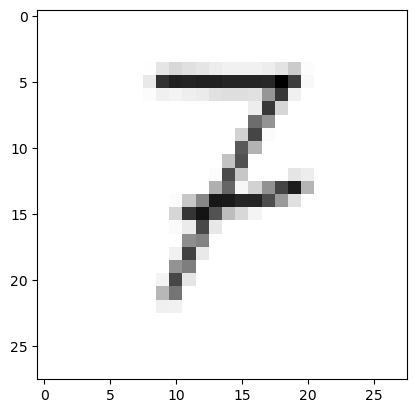

In [ ]:
y = np.expand_dims(img_np, axis=0)
res1 = model.predict(y)
print( res1 )
print( np.argmax(res1) )

plt.imshow(img_np, cmap=plt.cm.binary)
plt.show()